Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

Attribute Information: • cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

• bruises: bruises=t, no=f

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=n

• gill-spacing: close=c, crowded=w, distant=d

• gill-size: broad=b, narrow=n

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

• stalk-shape: enlarging=e, tapering=t

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y

• veil-type: partial=p, universal=u

• veil-colour: brown=n, orange=o, white=w, yellow=y

• ring-number: none=n, one=o, two=t

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
mushroom=pd.read_csv(r"C:\Users\user\Downloads\mushrooms.csv")

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dimension of the dataset

In [4]:
mushroom.shape

(8124, 23)

# Basic information from dataset

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#All are categorical variables in the dataset

# Basic summary of the dataset

In [7]:
mushroom.describe(include = 'object').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# Check for any duplicates in dataset

In [8]:
duplicate=mushroom[mushroom.duplicated()]
duplicate.shape

(0, 23)

In [9]:
#There are no duplicate rows in the dataset

# Exploratory Data analysis

We will do the univariate and bivariate analysis of each features individually and with respect to target

Distribution of mushroom class

In [10]:
count=mushroom['class'].value_counts()
count.to_frame()

,class
e,4208
p,3916


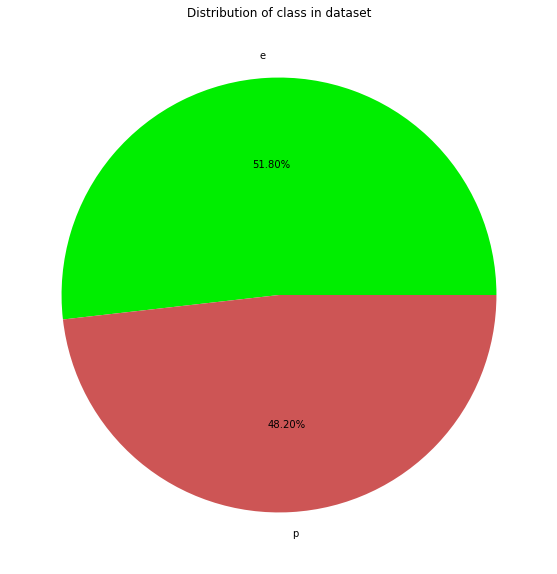

In [11]:
plt.figure(figsize=(10,10))
plt.pie(count,labels=count.index,autopct='%1.2f%%',colors=["#00EE00","#CD5555",])
plt.title("Distribution of class in dataset")
plt.show()

We can see that the dataset is balanced as they are almost in the range of 50% with edible 51.80% and poisonous as 48.20%

In [12]:
#mushroom.groupby(['cap-shape'])['class'].value_counts().to_frame()

In [13]:
#mushroom.groupby(['cap-surface'])['class'].value_counts().to_frame()

Distribution of All the features - Univariate and Bivariate with respect to Class

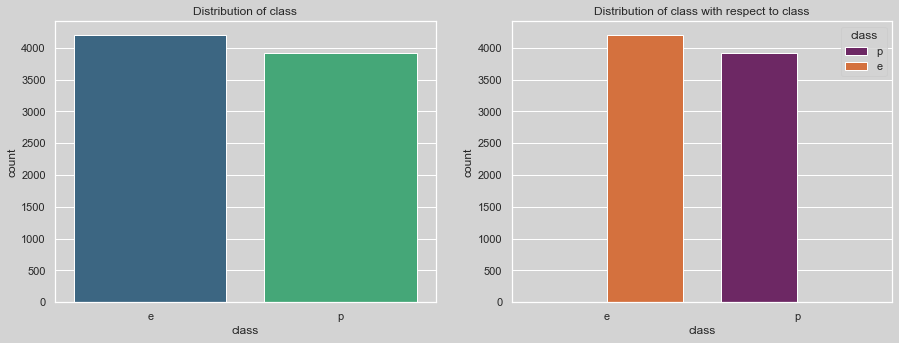

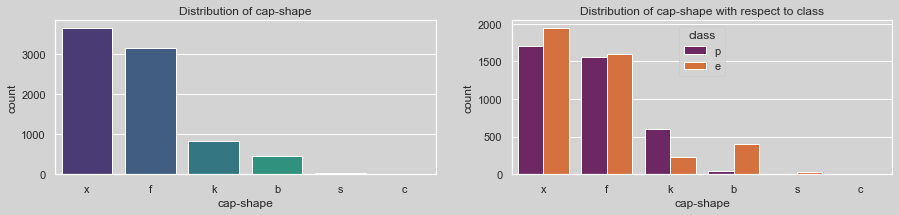

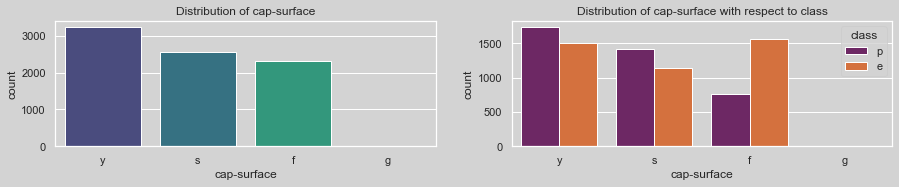

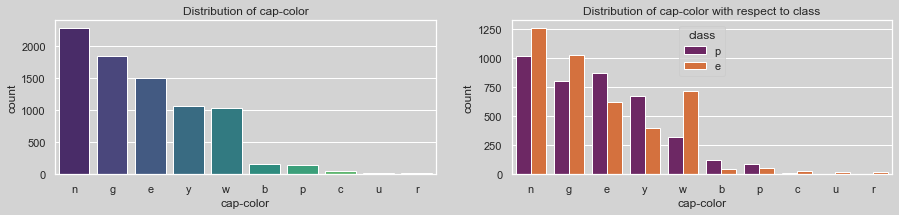

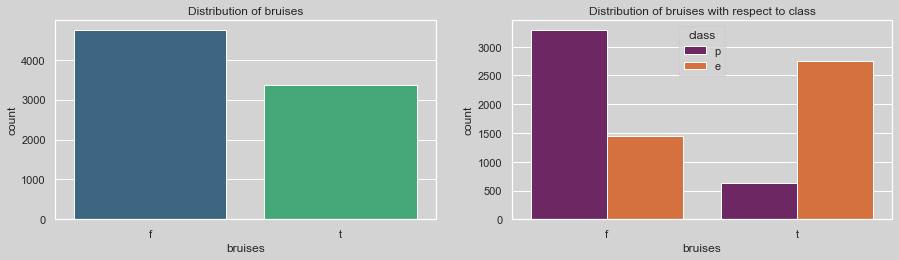

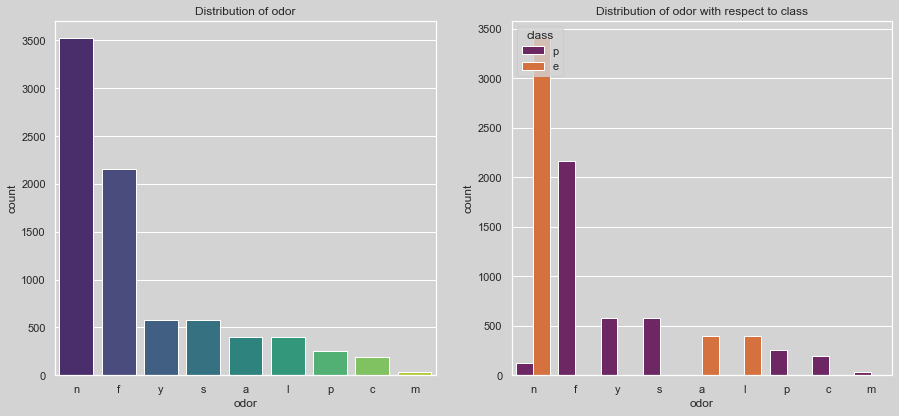

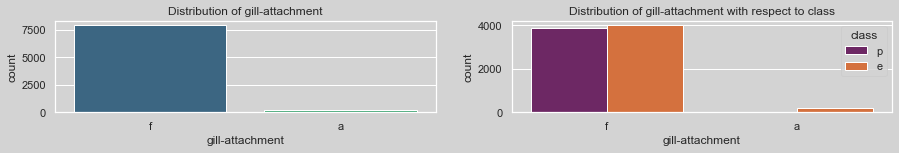

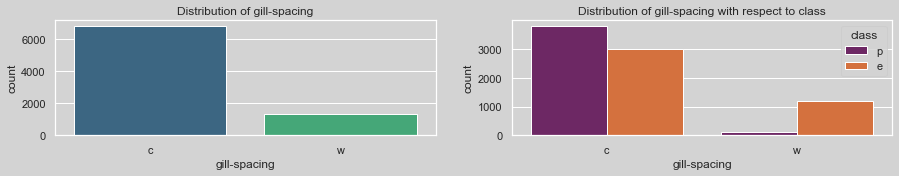

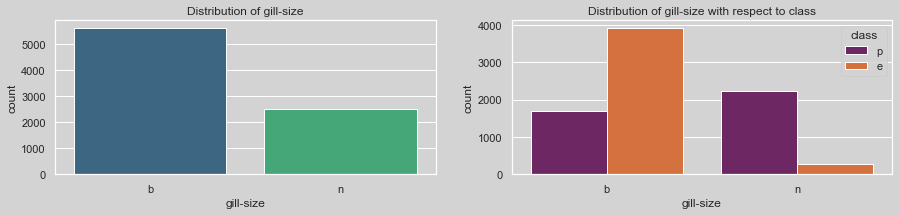

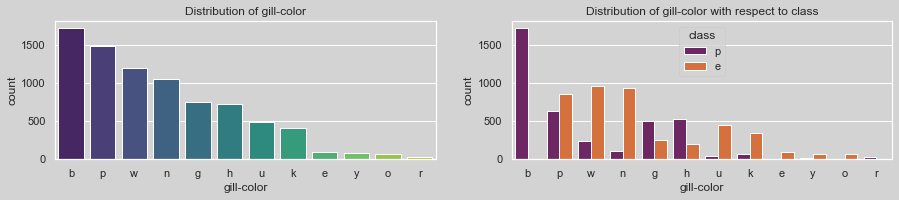

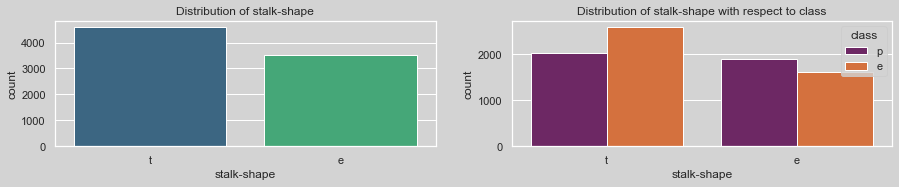

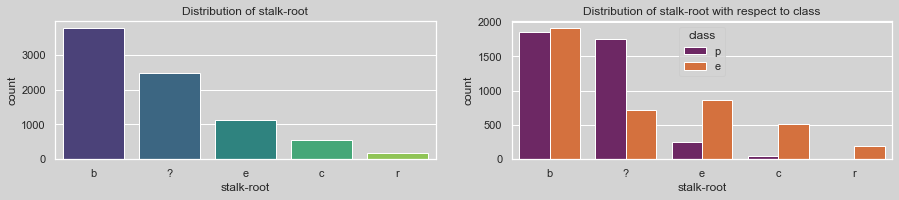

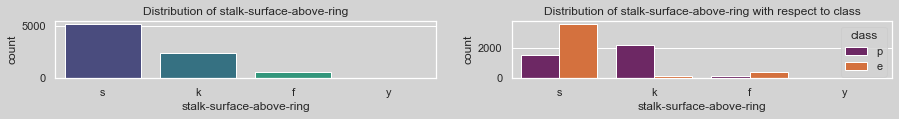

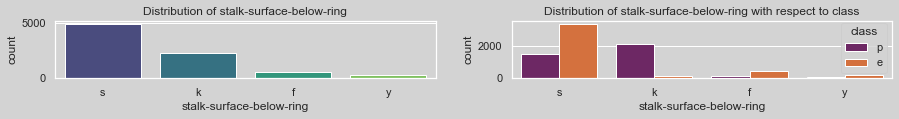

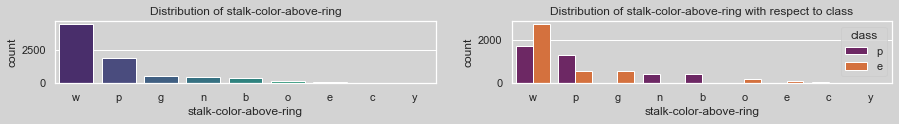

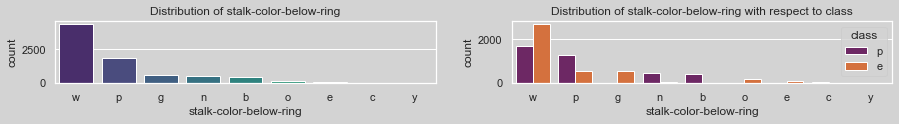

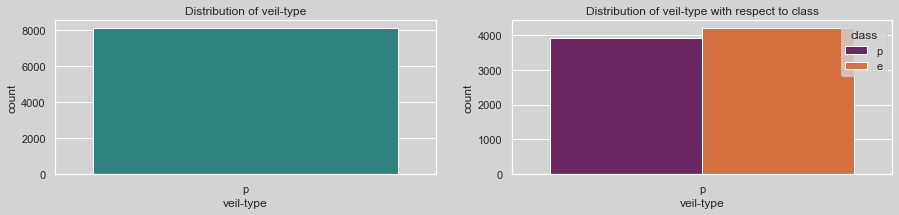

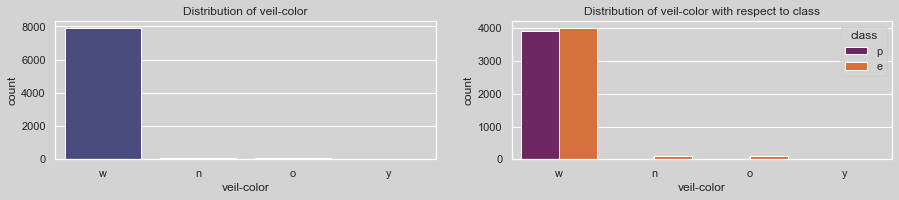

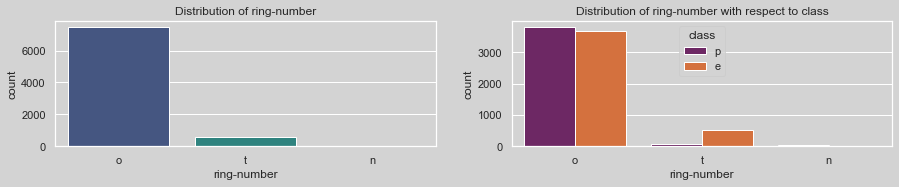

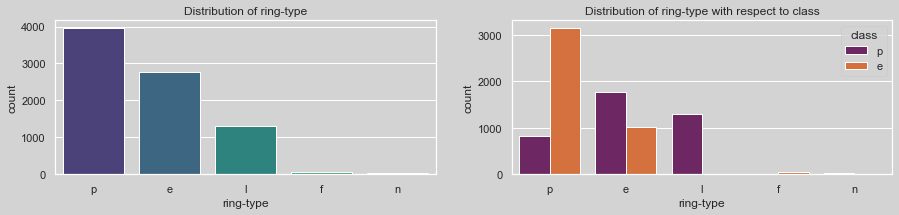

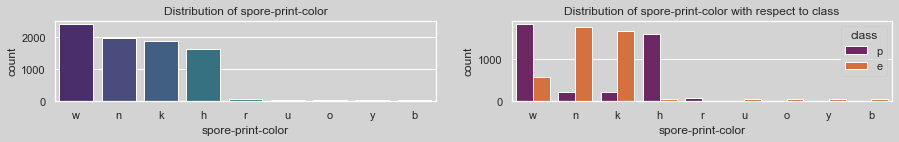

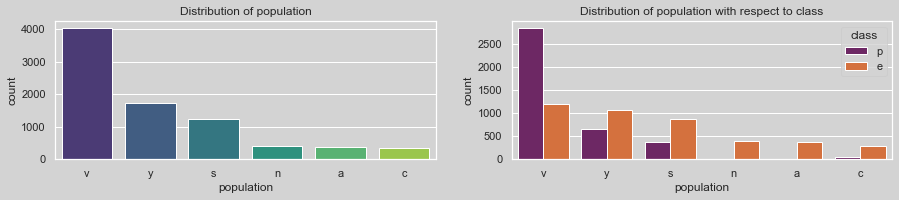

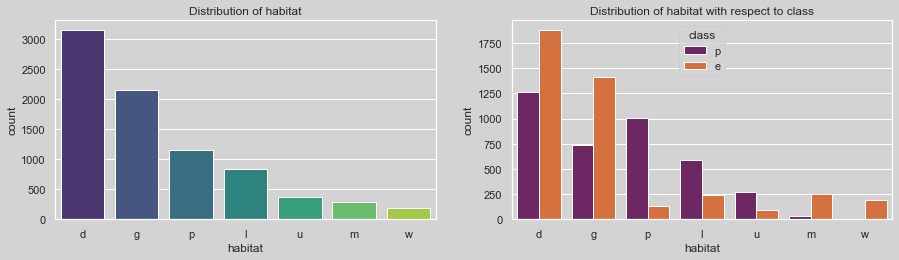

In [14]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

for columns in mushroom.columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(columns), 2, 1)
    sns.countplot(x=mushroom[columns],order=mushroom[columns].value_counts().index,palette="viridis")
    plt.title('Distribution of {}'.format(columns))
    
    plt.subplot(len(columns), 2, 2)
    sns.countplot(x=mushroom[columns],order=mushroom[columns].value_counts().index,hue=mushroom["class"],palette="inferno")
    plt.title('Distribution of {} with respect to class'.format(columns))
    plt.show()

# Inferences from graphs



Cap shape (bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s)

Convex shape is having the highest distribution among the cap shape followed by flat with conical the least
Edible type tops the cap shape in convex , flat, bell
Flat type has somewhat equal distribution of class
Poisonous shape tops in knobbed cap shape
Only the sunken has Edible type and conical has poisonous type cap shape
Cap surface (bruises=t, no=f)

Scaly surface is having the highest distribution among the cap surface followed by smooth with grooves the least
Edible type tops only in fibrous
Poisonous shape tops in scaly and smooth
Only the groove has poisonous type cap surface
Cap colour ( brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y )

Brown tops the list of cap colour followed by gray and red with green the least
Majority of the Brown , Grey and white mushrooms are edible but red , yellow , buff and pink have more poisonous
Green and purple ones have only edible
Bruises(bruises=t, no=f)

The dataset has more number of not bruised ones
Edible ones are more in bruised, so bruised is contibuting to predicting edible as it is having high %
Poisonous are more in no bruised
odour(almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s )

No smell and foul are having more number with nusty the least
Foul , fishy , spicy , pungent, creosote are poisonous
Almond and anise are edibles
No odour ones are more edibles - so odour is an important feature in prediction
Gill attachment(attached=a, descending=d, free=f, notched=n)

Free is having more number compared to attached which is very less
Majority of gill attached are edible
Free is having almost equal distribution
Notched and descending gill attachment not found in dataset
Gill spacing (close=c, crowded=w, distant=d)

close is more in number
Edible is more in crowded and poisonous is more in close
distant is not present
Gillsize(broad=b, narrow=n )

Broad size is more in number
Edible is more in broad and poisonous more in narrow
Gill colour( black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y)

Buff gill colour is more in number
All buff and green colour are fully poisonous
Orange and red gill colour are fully edible
Stalk-shape(enlarging=e, tapering=t )

Tapering is more in number and enlarging is nearer to tapering in number
Tapering is having more edible and enlarging has more poisonous
Stalk-root(bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? )

Stalk root has some missing values with is coming second , it has more poisonous ones
Bulbous is more in number
All have edible more than poisonous woth bulbous having almost equal distribution of class
rooted is fully edible
Stalk-surface-above-ring ( fibrous=f, scaly=y, silky=k, smooth=s )

Smooth is more in number and having more edible ones
Majority of the silky ones are poisonous
scaly is the least
Stalk-surface-below-ring(fibrous=f, scaly=y, silky=k, smooth=s)

It is following the same pattern as bove ring with smooth the highest number
Smooth above and below ring majorly has edible ones
SIlky above and below majorly has poisonous ones
Stalk-colour-above-ring(brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y )

white is the highest followed by pink and gray with yellow the least
White is having more edible ones and pink having more poisonous ones
gray , orange , red having fully edible ones
buff , cinnamon , yellow are fully poisonous
Stalk-colour-below-ring( brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y )

Following the same as above ring
from above and below ring colour we can generalise
gray , orange , red having fully edible ones
buff , cinnamon , yellow are fully poisonous
white is the highest followed by pink and gray with yellow the least
White is having more edible ones and pink having more poisonous ones
Veil-type(partial=p, universal=u )

-There is only one type partial - so no significance , we can remove this in feature reduction

Veil-colour(brown=n, orange=o, white=w, yellow=y)

Almost all the ones are white
Almost equal distribution of class in white colour
Orange and brown fully edible and yellow is fully poisonous , but they are very few in number in the dataset
Ring-number(none=n, one=o, two=t )

one ring number is more in number and almost equal distribution of class
None are least and all are poisonous
two rings are in between with edible more in number
Ring-type(cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z )

Pendant is more in number and more edibles ones
large and none are full poisonous
Flaring is fully edible
Spore-print-colour(black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y)

White is having more number and have more poisonous ones
White is followed bu none , brown , black , chocolate colour
Chocolate is having high % poisonous and green is fully poisonous
Brown and Black are majorly edible
Orange , Purple ,yellow , buff are fully edible
Population(abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y )

several is having more number and majorly poisonous
solitary and scattered are majorly edible
numerous and abundant are fully edible
Habitat(grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,woods=d )

Wood is more in number and majority is edible
Grasses is second and it is also majorly edible
Paths , leaves , urban ones are more poisonous
All waste ones are edible

# Data Pre processing

Check for missing values

In [15]:

mushroom.isnull().sum().to_frame().style.bar(color="red")

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


From the above there are no missing values , but from the visualisation we can see that in stalk root there is a ? indicating the missing values

This needs to be handled - since the data type is categorical , we can replace with the maximum repeating value

In [16]:
mushroom["stalk-root"] = mushroom["stalk-root"].replace("?",np.NaN)

In [18]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


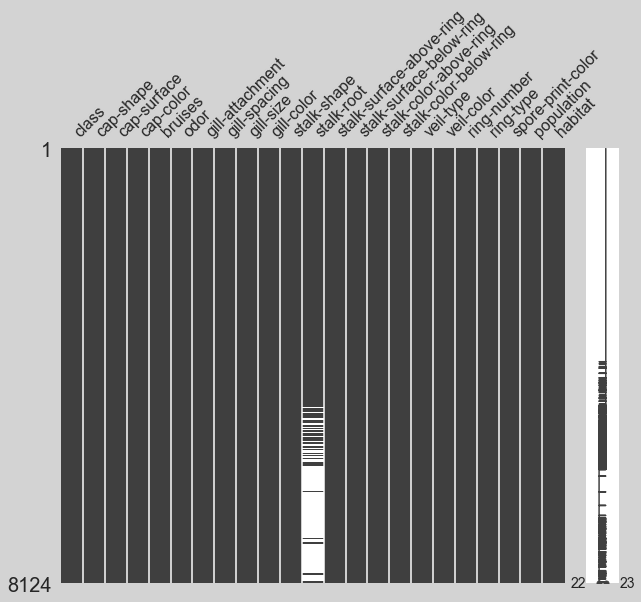

In [19]:
import missingno as msno
msno.matrix(mushroom,figsize=(10,8))
plt.show()

In [20]:
mushroom["stalk-root"].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

From the above the bulbous is the maximum repeating value , so we can replace the missing wit bulbous

In [21]:
mushroom["stalk-root"].fillna(mushroom["stalk-root"].mode()[0],inplace=True)

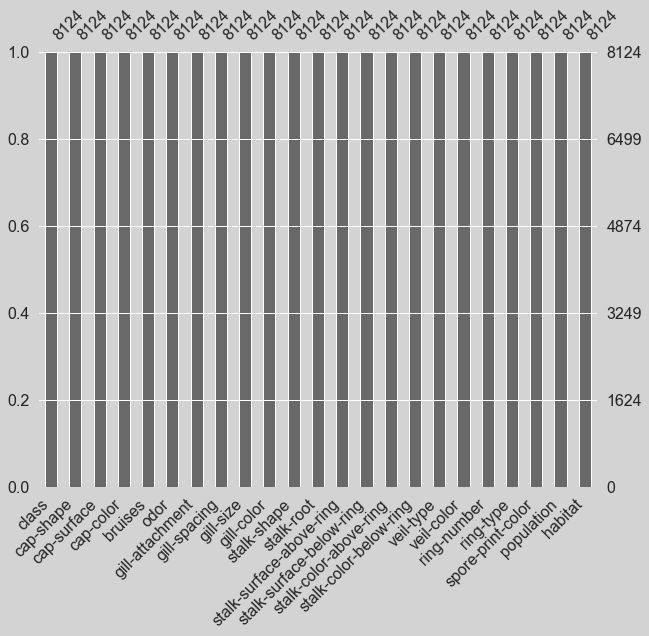

In [22]:
msno.bar(mushroom,figsize=(10,8))
plt.show()

We can see that there are no missing values

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = mushroom.apply(LabelEncoder().fit_transform)   
df.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


# Check for correlation

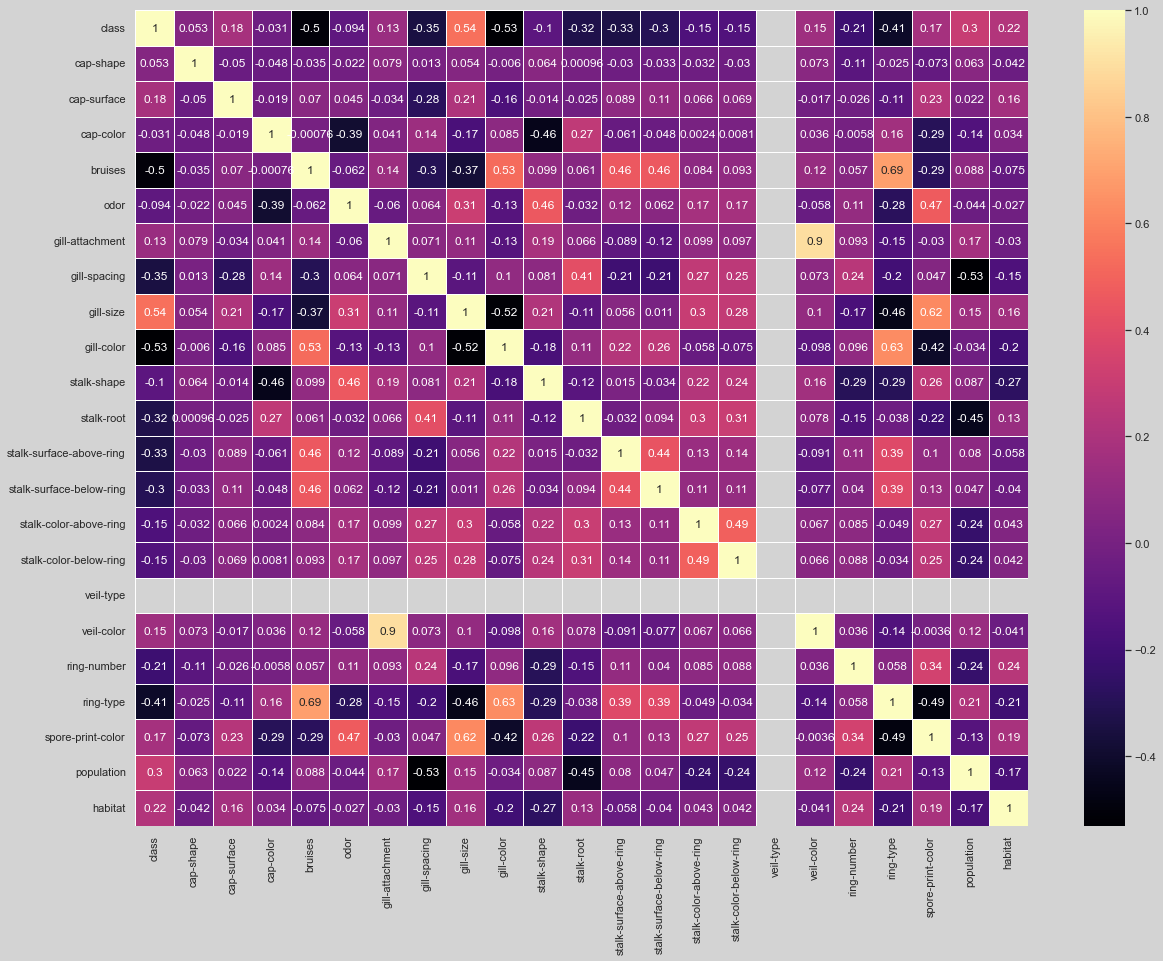

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

In [25]:
df.corr()["class"].sort_values(ascending=False).to_frame()

,class
class,1.000000
gill-size,0.540024
population,0.298686
habitat,0.217179
cap-surface,0.178446
spore-print-color,0.171961
veil-color,0.145142
gill-attachment,0.129200
cap-shape,0.052951
cap-color,-0.031384


From the above we can see that the veil type is of no signficance as this is a single value which we observed during EDA

So we can remove the column from the dataset

The gill size is having the maximum positive correlation with the target and gill colur is having the maximum negative correlation with target

Cap shape and cap color are having correlation very close to zero with the target

# Feature reduction

In [26]:

df.drop(["veil-type"],axis=1, inplace = True)

# Feature selection


Here since the input and output variable are both categorical , we can choose chi sqaure test for the feature selection

In [28]:
X = df.drop(["class"], axis=1)
y = df["class"]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


# Finding the top features using Kbest function with chi square as the parameter

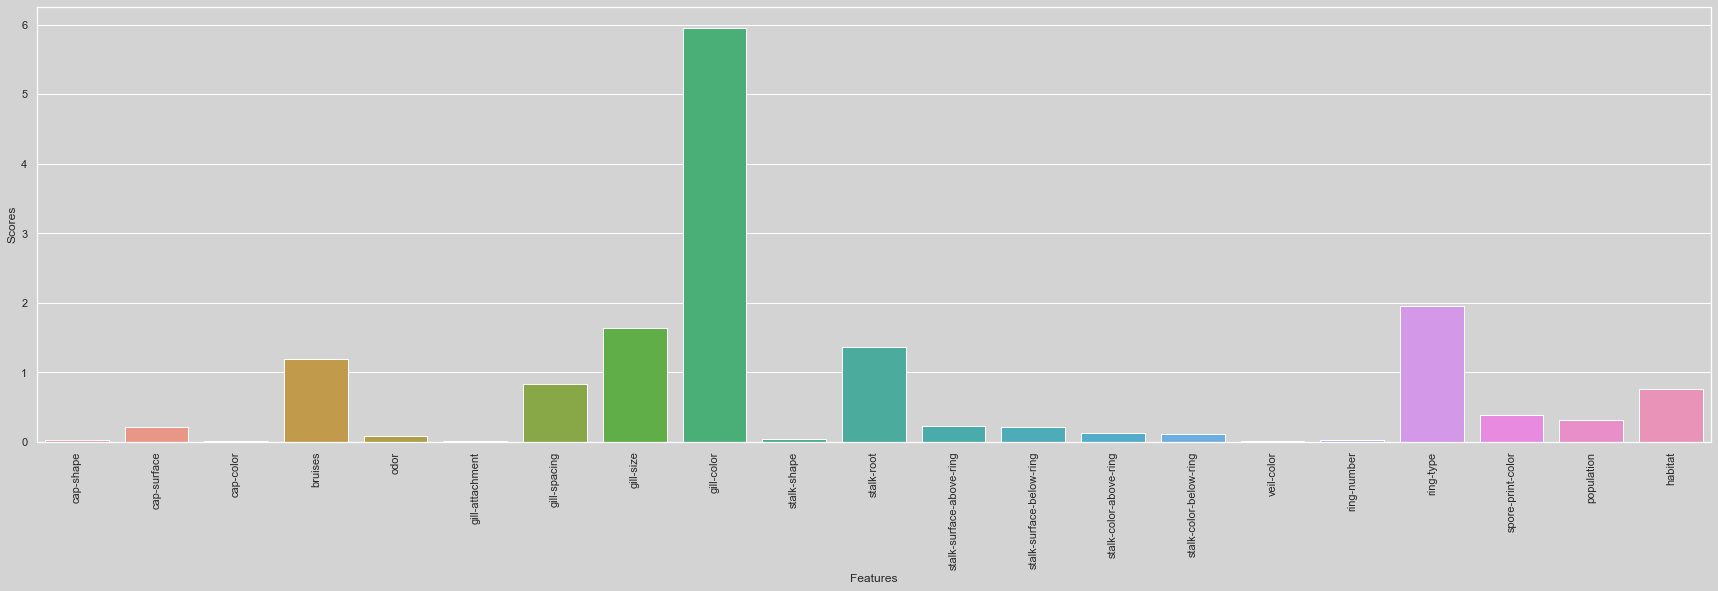

In [29]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X,y)
scores=selector.scores_/1000
scores_data=pd.DataFrame({'Features': X.columns,'Scores':scores})
plt.figure(figsize=(30,8))
sns.barplot(x='Features',y='Scores',data=scores_data,)
plt.xticks(rotation=90)
plt.show()

In [30]:
top_features=scores_data.sort_values(by='Scores',ascending=False)
top_features

,Features,Scores
8,gill-color,5.957764
17,ring-type,1.950610
7,gill-size,1.636607
10,stalk-root,1.358359
3,bruises,1.194277
6,gill-spacing,0.826795
20,habitat,0.751309
18,spore-print-color,0.379133
19,population,0.311767
11,stalk-surface-above-ring,0.222982


In [31]:
#Filtering top 15 features only and keeping them in dataset
top_features=top_features.head(15)
top_features=top_features.reset_index(drop=True)
top_features

,Features,Scores
0,gill-color,5.957764
1,ring-type,1.950610
2,gill-size,1.636607
3,stalk-root,1.358359
4,bruises,1.194277
5,gill-spacing,0.826795
6,habitat,0.751309
7,spore-print-color,0.379133
8,population,0.311767
9,stalk-surface-above-ring,0.222982


In [32]:
X_scores=X[top_features['Features']] 

In [33]:
X_scores.head()

,gill-color,ring-type,gill-size,stalk-root,bruises,gill-spacing,habitat,spore-print-color,population,stalk-surface-above-ring,cap-surface,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,odor
0,4,4,1,2,1,0,5,2,3,2,2,2,7,7,6
1,4,4,0,1,1,0,1,3,2,2,2,2,7,7,0
2,5,4,0,1,1,0,3,3,2,2,2,2,7,7,3
3,5,4,1,2,1,0,5,2,3,2,3,2,7,7,6
4,4,0,0,2,0,1,1,3,0,2,2,2,7,7,5


We have now eliminated some features and reduced to 15

In [34]:
X_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0
ring-type,8124.0,2.291974,1.801672,0.0,0.0,2.0,4.0,4.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
stalk-root,8124.0,0.415066,0.812647,0.0,0.0,0.0,0.0,3.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
habitat,8124.0,1.508616,1.719975,0.0,0.0,1.0,2.0,6.0
spore-print-color,8124.0,3.596750,2.382663,0.0,2.0,3.0,7.0,8.0
population,8124.0,3.644018,1.252082,0.0,3.0,4.0,4.0,5.0
stalk-surface-above-ring,8124.0,1.575086,0.621459,0.0,1.0,2.0,2.0,3.0


In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X_final = min_max.fit_transform(X_scores)

# Modelling

In [36]:
#Checking the imbalance of the dataset
y.value_counts(normalize=True).to_frame()

,class
0,0.517971
1,0.482029


As seen before , dataset is almost balance so we can proceed

In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

In [41]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [42]:
print("Results from logistic regression are as below")
log_result = classification_report(y_predict,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_predict,y_test))

Results from logistic regression are as below


,precision,recall,f1-score,support
0,0.953063,0.936669,0.944795,1279.000000
1,0.931414,0.949094,0.940171,1159.000000
accuracy,0.942576,0.942576,0.942576,0.942576
macro avg,0.942238,0.942882,0.942483,2438.000000
weighted avg,0.942771,0.942576,0.942597,2438.000000


# 2.SVM

In [43]:
SV=SVC()
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)

In [44]:
print("Results from SVM are as below")
SVM_result = classification_report(y_pred,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred,y_test))

Results from SVM are as below


,precision,recall,f1-score,support
0,1.000000,0.986656,0.993283,1274.000000
1,0.985605,1.000000,0.992751,1164.000000
accuracy,0.993027,0.993027,0.993027,0.993027
macro avg,0.992803,0.993328,0.993017,2438.000000
weighted avg,0.993127,0.993027,0.993029,2438.000000


# 3.KNN

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9987694831829368, 0.9987694831829368, 0.9987694831829368, 0.9987694831829368, 0.9983593109105825, 0.9983593109105825, 0.9975389663658737, 0.9975389663658737, 0.9975389663658737, 0.9975389663658737]


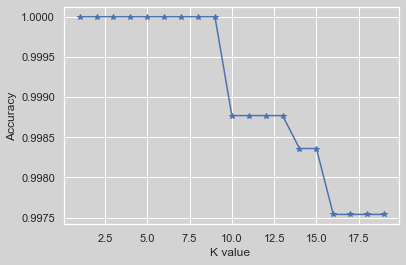

In [45]:
KNN_values=[]
neighbours=np.arange(1,20)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")
plt.show()

In [46]:
KNN=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred1=KNN.predict(X_test)

In [47]:
print("Results from KNN are as below")
KNN_result = classification_report(y_pred1,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred1,y_test))

Results from KNN are as below


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1257.000000
1,1.000000,1.000000,1.000000,1181.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,2438.000000
weighted avg,1.000000,1.000000,1.000000,2438.000000


# 4.Decision Tree

In [48]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred2 = DT.predict(X_test)

In [49]:

print("Results from Decision Tree are as below")
DT_result = classification_report(y_pred2,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred2,y_test))

Results from Decision Tree are as below


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1257.000000
1,1.000000,1.000000,1.000000,1181.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,2438.000000
weighted avg,1.000000,1.000000,1.000000,2438.000000


# 5.Random Forest

In [50]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train) 
y_pred3 = RF.predict(X_test)

In [51]:
print("Results from Random Forest are as below")
RF_result = classification_report(y_pred3,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred3,y_test))

Results from Random Forest are as below


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1257.000000
1,1.000000,1.000000,1.000000,1181.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,2438.000000
weighted avg,1.000000,1.000000,1.000000,2438.000000


# Gradient boosting

In [52]:
GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [53]:
print("Results from Gradient Boosting are as below")
GB_result = classification_report(y_pred4,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred4,y_test))

Results from Gradient Boosting are as below


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1257.000000
1,1.000000,1.000000,1.000000,1181.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,2438.000000
weighted avg,1.000000,1.000000,1.000000,2438.000000


# Xtreme Gradient Boosting

In [54]:
xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
y_pred5 = xgb_model.predict(X_test)

In [55]:
print("Results from Xtreme Gradient boosting are as below")
xgb_result = classification_report(y_pred5,y_test,output_dict=True)
xgb_result = pd.DataFrame(xgb_result).transpose()
xgb_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

Results from Xtreme Gradient boosting are as below


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1257.000000
1,1.000000,1.000000,1.000000,1181.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,2438.000000
weighted avg,1.000000,1.000000,1.000000,2438.000000


# AdaBoost Classifier Model

In [ ]:
AD=AdaBoostClassifier()
AD_model= AD.fit(X_train , y_train)
y_pred6=AD_model.predict(X_test)

In [ ]:
print("Results from ADA booster are as below")
AD_result = classification_report(y_pred6,y_test,output_dict=True)
AD_result = pd.DataFrame(AD_result).transpose()
AD_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

# Gaussian Naiver Bayes

In [ ]:
GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred7=GNB_model.predict(X_test)

In [ ]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred7,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred5,y_test))

# Bagging Classifier

In [ ]:
BC=BaggingClassifier()
BC_model=BC.fit(X_train , y_train)
y_pred8=BC_model.predict(X_test)

In [ ]:
print("Results from Bagging classifier are as below")
BC_result = classification_report(y_pred8,y_test,output_dict=True)
BC_result = pd.DataFrame(BC_result).transpose()
BC_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred8,y_test))

# Bernoulli Classifier

In [ ]:
BNB=BernoulliNB()
BNB_model=BNB.fit(X_train , y_train)
y_pred9=BNB_model.predict(X_test)

In [ ]:
print("Results from Bernoulli Naive bayer are as below")
BNB_result = classification_report(y_pred9,y_test,output_dict=True)
BNB_result = pd.DataFrame(BNB_result).transpose()
BNB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred9,y_test))

# Multinomial Classifier

In [72]:
MNB=MultinomialNB()
MNB_model=MNB.fit(X_train , y_train)
y_pred10=MNB_model.predict(X_test)

In [73]:
print("Results from Bernoulli Naive bayer are as below")
MNB_result = classification_report(y_pred10,y_test,output_dict=True)
MNB_result = pd.DataFrame(MNB_result).transpose()
MNB_result.style.background_gradient(cmap="BuPu")
#print("Confusion Matrix \n" ,confusion_matrix(y_pred9,y_test))

Results from Bernoulli Naive bayer are as below


,precision,recall,f1-score,support
0,0.940334,0.781746,0.853738,1512.000000
1,0.720576,0.919006,0.807784,926.000000
accuracy,0.833880,0.833880,0.833880,0.833880
macro avg,0.830455,0.850376,0.830761,2438.000000
weighted avg,0.856866,0.833880,0.836283,2438.000000


In [74]:
#Combining the F1 score and accuracy results of all the models

In [77]:
dfc =pd.concat([log_result["f1-score"], SVM_result["f1-score"],KNN_result["f1-score"],DT_result["f1-score"],RF_result["f1-score"],GB_result["f1-score"], xgb_result["f1-score"],AD_result["f1-score"], GNB_result["f1-score"],BC_result["f1-score"],BNB_result["f1-score"],MNB_result["f1-score"]],axis=1)
dfc.columns
df2 = dfc.set_axis(["log_result", "SVM_result","KNN_result","DT_result","RF_result","GB_result", "xgb_result","AD_result","GNB_result","BC_result","BNB_Res

SyntaxError: EOL while scanning string literal (Temp/ipykernel_10088/218386104.py, line 3)

In [78]:
df2.loc[["macro avg","accuracy"]].transpose().sort_values(by="macro avg",ascending=False).style.background_gradient(cmap="RdPu")

NameError: name 'df2' is not defined

We can see that Except SVM , Logistic regression and Naive bayes algorithm , all are having 100 %

We will try to do hyper parameter tuning in Naive bayers and try to improve the results

Hyper Parameter tuning of Gaussian Naive Bayes Algorithm

In [58]:
from pprint import pprint

GNB=GaussianNB()

print('Parameters currently in use:\n')
pprint(GNB.get_params())

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=4,  n_repeats=5, random_state=500)

In [67]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

GNB=GaussianNB()
rs_NB = RandomizedSearchCV(estimator=GNB,param_distributions=params_NB,cv=cv_method ,verbose=1,scoring='f1',random_state = 42)

Data_transformed = PowerTransformer().fit_transform(X_train)
rs_NB.fit(Data_transformed, y_train)

rs_NB.best_params_

Fitting 20 folds for each of 10 candidates, totalling 200 fits


{'var_smoothing': 0.01}

In [68]:
Data_trans = PowerTransformer().fit_transform(X_test)
pred=rs_NB.predict(Data_trans)
print('The accuracy of the NaiveBayes is',accuracy_score(pred,y_test))

The accuracy of the NaiveBayes is 0.8978671041837571


In [69]:
print("Results from Gaussian Naive bayer are as below")
HyperGNB_result = classification_report(pred,y_test,output_dict=True)
HyperGNB_result = pd.DataFrame(HyperGNB_result).transpose()
HyperGNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.961814,0.857447,0.906637,1410.000000
1,0.829805,0.953307,0.887279,1028.000000
accuracy,0.897867,0.897867,0.897867,0.897867
macro avg,0.895810,0.905377,0.896958,2438.000000
weighted avg,0.906151,0.897867,0.898475,2438.000000


In [70]:
df_res =pd.concat([GNB_result["f1-score"], HyperGNB_result["f1-score"]],axis=1)
df_result=df_res.set_axis(["Naive Bayes Before HT","Naive Bayes After HT"],axis=1)

NameError: name 'GNB_result' is not defined